In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, HfArgumentParser, AutoConfig, AutoModelForSequenceClassification
from datasets import load_dataset
from trl import ModelConfig, RewardConfig, RewardTrainer, get_kbit_device_map, get_peft_config, get_quantization_config
import torch
import os

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    # model.resize_token_embeddings(len(tokenizer))
tokenizer.model_max_length = 512 #NOTE: might wanna change this

e:\Anaconda\envs\mnlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# from datasets import DatasetDict

name = "Tachi67/rm_data_action"

dataset_1 = load_dataset(name)

dataset_2 = load_dataset("Tachi67/rm_data_motivation")

dataset_3 = load_dataset("Tachi67/rm_data_consequences")

Generating test split: 100%|██████████| 2243/2243 [00:00<00:00, 560857.51 examples/s]


Max length:  361
Min length:  34
Mean length:  62.25747547293808
Median length:  59


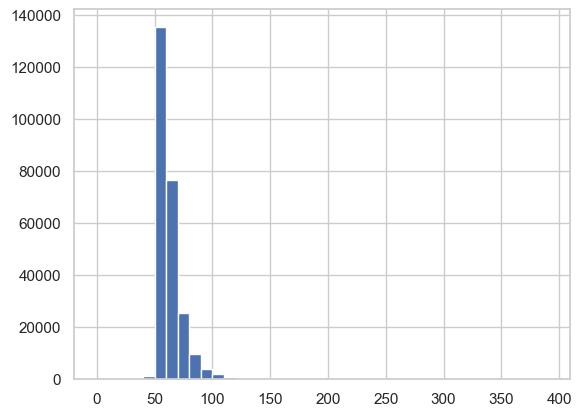

In [14]:
tokenizer.model_max_length = 512 #NOTE: might wanna change this

# see max token length in the data
lengths = []

def append_length(dataset, lengths):
    for i in range(len(dataset['train'])):
        lengths.append(len(tokenizer(dataset['train'][i]['chosen'], truncation=True)['input_ids']))
        lengths.append(len(tokenizer(dataset['train'][i]['rejected'], truncation=True)['input_ids']))
        
append_length(dataset_1, lengths)
append_length(dataset_2, lengths)
append_length(dataset_3, lengths)

# print statistics
print("Max length: ", max(lengths))
print("Min length: ", min(lengths))
print("Mean length: ", sum(lengths)/len(lengths))
print("Median length: ", sorted(lengths)[len(lengths)//2])

# plot distribution
import matplotlib.pyplot as plt
plt.hist(lengths, bins=range(0, 400, 10))
plt.show()


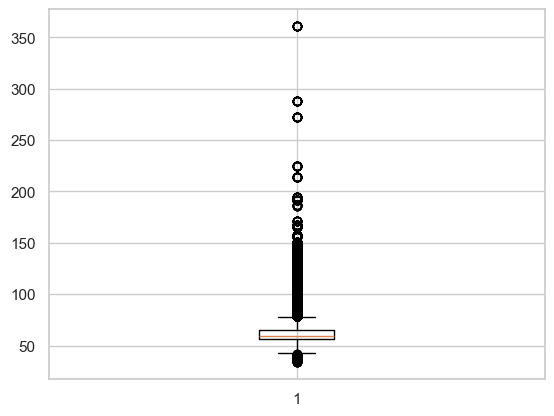

In [15]:

# plot boxplot
plt.boxplot(lengths)
plt.show()

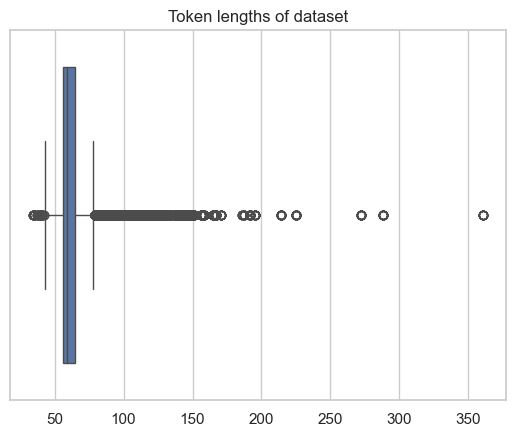

In [20]:
# draw box plot with seaborn
import seaborn as sns
# add title

sns.boxplot(x=lengths)
plt.title('Token lengths of dataset')

# make it fancy
sns.set(style="whitegrid")


# save the plot to a file
plt.savefig('token_lengths.png')

plt.show()



In [18]:
# portion of data where length <= 100
print("Portion of data where length <= 100: ", len([x for x in lengths if x <= 100])/len(lengths))

Portion of data where length <= 100:  0.9862069505077532
